# Conor Sayres
# Astro 597 HW1a


First, practice plotting with Julia.  Here's a plot of the radial veloicty data set provided for hw 1. First read in the txt file.

$$x$$

In [1]:
using Plots
using DelimitedFiles
mp = readdlm("mystery_planet1.txt");
ts = mp[:,1];
radVel = mp[:,2];
vErr = mp[:,3];

Create a function to sort the time series elements by time (this will be used later in phase folding).  But for now use it to order the points in time for a nice plot output.

In [2]:
function sortByTime(ts, radVel, vErr)
    sortInds = sortperm(ts);
    ts = ts[sortInds];
    radVel = radVel[sortInds];
    vErr = vErr[sortInds];
    return ts, radVel, vErr
end

# sort by increasing time and normalize to t=0
ts, radVel, vErr = sortByTime(ts, radVel, vErr);
ts = ts .- ts[1];

Create a generic function for plotting the timeseries, and plot it.

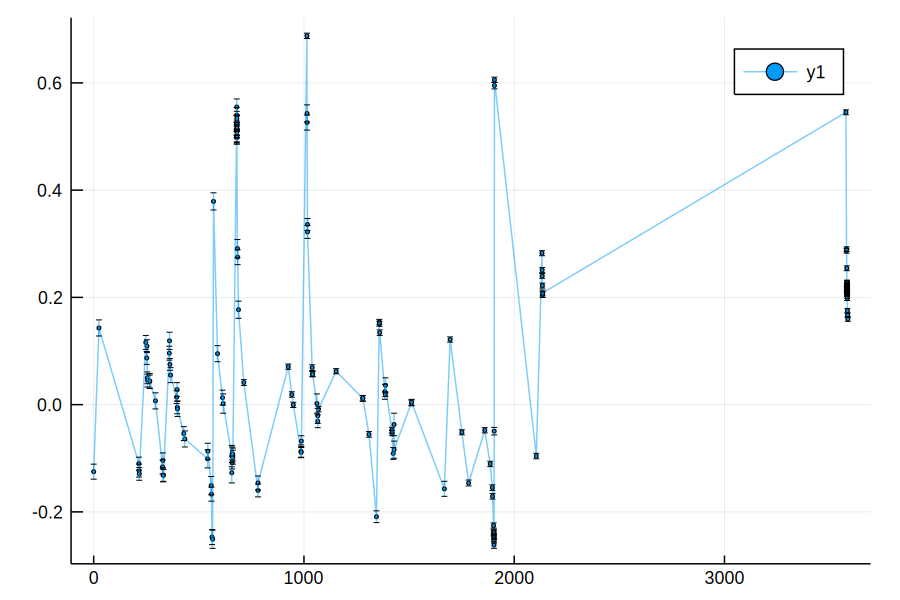

In [5]:
function plotTimeseries(ts, radVel, vErr)
    # plot the time series
    plot(ts, radVel, markersize=1, markershape=:auto, line=:solid, linealpha=0.5, yerror=vErr, dpi=150)
end

# generate the plot
plotTimeseries(ts,radVel,vErr)

Next, solve Keplers Equation using Newtons method.  Strategy:
$$g(E,e,M) = E - e * sinE - M$$
coded here:

In [8]:
function g(E, e, M)
    # E = Eccentric anomaly input in radians
    # e = eccentricity (0-1)
    # M = mean anomaly, input in radians

    # returns g as provided in HW
    return E - e * sin(E) - M;

end

g (generic function with 1 method)

and
$$\frac{\partial g}{\partial E} = 1 - e * cosE$$
coded here:

In [7]:
# time derivative of g(E) for use in newton solver
function dg_dt(E, e)
    # E = Eccentric anomaly input in radians
    # e = eccentricity (0 - 1)

    # returns dg/dt as provided in HW
    return 1 - e * cos(E);
end

dg_dt (generic function with 1 method)

Here's the iterative solver, calling the functions above g and its time derivative.  Exiting when the change in E is less than epsilon.

In [10]:
# a newton solver for Keplers equation
function newtonSolver(e, M)

    # e = eccentricity (0-1)
    # M = mean anomaly, input in radians (0-2pi)

    # returns
    # E = Eccentric anomaly in radians, iterations took, and last error

    # starting point for solver, starting point suggested in lecture
    E_o = M + 0.85 * e * sign(sin(M))
    # exit tolerance
    epsilon = 1e-15
    maxIter = 1000000
    iter = 1

    while iter < maxIter
        global E_next # eventual return value
        global E_error
        iter += 1
        der = dg_dt(E_o, e)
        if der == 0
            der = 1e-16 # avoid zero division
        end
        E_next = E_o - g(E_o,e,M) / der
        E_error = abs(E_o-E_next)
        if E_error < epsilon
            break # stop iteration we've converged
        end
        # update value and continue looping
        E_o = E_next
    end

    return E_next, iter, E_error
end

newtonSolver (generic function with 1 method)

Finally, lets test the solver on 10 random choices of eccentricity and Mean anomaly, ranging between [0,1] and [0,2*pi] respectively.

In [11]:
print("Trying 10 random inputs to newton solver\n")
print("(e, M) --> E (iter, error)\n")
print("-----------------------------\n")
for i in 1:10
    # print("input: e=$e M=$M \n")
    e = rand()
    M = rand() * 2 * pi
    (E, iter, E_error) = newtonSolver(e, M)
    print("($e, $M) --> $E ($iter, $E_error)\n")
    # print("output: E=$E iter=$iter error=$E_error \n\n")
end
print("-----------------------------\n")

Trying 10 random inputs to newton solver
(e, M) --> E (iter, error)
-----------------------------
(0.6749982240847445, 1.4920385107185234) --> 2.081054432997756 (5, 0.0)
(0.5964639833048588, 4.717469646110713) --> 4.198148423406998 (5, 0.0)
(0.6812676206268673, 3.6029273846752874) --> 3.417401182276239 (5, 0.0)
(0.19672482666849134, 1.4469353382771957) --> 1.6431455206998906 (5, 0.0)
(0.657803057755908, 4.361904436297558) --> 3.906429098511813 (6, 0.0)
(0.9471481210221511, 3.321019374931393) --> 3.2338046639162457 (6, 4.440892098500626e-16)
(0.8902929449918513, 1.5710893089688205) --> 2.2588345952554665 (6, 0.0)
(0.5398912397131392, 0.14874515279887404) --> 0.31707940112323285 (6, 0.0)
(0.8067790007059448, 1.20159946336989) --> 1.9508196194894645 (6, 2.220446049250313e-16)
(0.312337744888594, 3.738644079489906) --> 3.6003345463195338 (5, 4.440892098500626e-16)
-----------------------------


Lastly, here are the values for Earth which I think are ok.

In [12]:
# for earth
M = 0.32
e = 0.0167
print("Earth input M: $M, e: $e\n")
E, iter, E_error = newtonSolver(e, M)
print("Solved Earth E: $E iter:$iter error:$E_error\n")

Earth input M: 0.32, e: 0.0167
Solved Earth E: 0.3253378024016099 iter:4 error:1.1102230246251565e-16
